## Лабораторна робота 6. **Unsupervised Learning**

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

## Кластерування  

В цій лабораторній роботі Ви будете вирішувати задачу класифікації БЕЗ вчителя. 

In [58]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline 

import os
import warnings


warnings.filterwarnings('ignore')

**Завдання 0** 

Для початку необхідно завантажити вибірку `Mall_Customers` і перейменувати атрибути `Annual Income (k$)` в `Income`,`Spending Score (1-100)` в `SpendingScore`

In [3]:
file_path = "D:/Vlad/Все ДЗ(2)/2/AI/Rep-AI/Mall_Customers.csv"
customer_set = pd.read_csv(file_path)

customer_set.rename(columns={
    "Annual Income (k$)": "Income",
    "Spending Score (1-100)": "SpendingScore"
}, inplace=True)

print(customer_set.head())

   CustomerID  Gender  Age  Income  SpendingScore
0           1    Male   19      15             39
1           2    Male   21      15             81
2           3  Female   20      16              6
3           4  Female   23      16             77
4           5  Female   31      17             40


**Завдання 1** 

Підготовка даних до опрацювання

* подивитись які атрибути містить вибірка; 
* вивести розмірність датасету;
* вивести основну статистичну інформацію по числовим змінним;  
* перевірити на наявність `NaN`.   

In [5]:
#yourCode

#назви стовпців
print("назви стовпців", customer_set.columns.tolist())

#виведення розмірність датасету
print("виведення розмірність датасету", customer_set.shape)

#основна статистична інформація по числовим змінним
print("основна статистична інформація по числовим змінним", customer_set.describe())

#NaN
print("NaN", customer_set.isnull().sum())

назви стовпців ['CustomerID', 'Gender', 'Age', 'Income', 'SpendingScore']
виведення розмірність датасету (200, 5)
основна статистична інформація по числовим змінним        CustomerID         Age      Income  SpendingScore
count  200.000000  200.000000  200.000000     200.000000
mean   100.500000   38.850000   60.560000      50.200000
std     57.879185   13.969007   26.264721      25.823522
min      1.000000   18.000000   15.000000       1.000000
25%     50.750000   28.750000   41.500000      34.750000
50%    100.500000   36.000000   61.500000      50.000000
75%    150.250000   49.000000   78.000000      73.000000
max    200.000000   70.000000  137.000000      99.000000
NaN CustomerID       0
Gender           0
Age              0
Income           0
SpendingScore    0
dtype: int64


## EDA Mall Customers

**Завдання 2** 

Як Ви могли помітити по статистичній аналітиці вибірки вона містить змінну `CustomerID`. Ця змінна не впливає на аналіз даних тому її можна видалити.

In [ ]:
#yourCode

#customer_set.drop(columns=["CustomerID"], inplace=True)

print(customer_set.columns.tolist())

['Gender', 'Age', 'Income', 'SpendingScore']


**Завдання 3** 

Побудувати діаграми розподілу по змінним `Age` , `Income` та `SpendingScore`

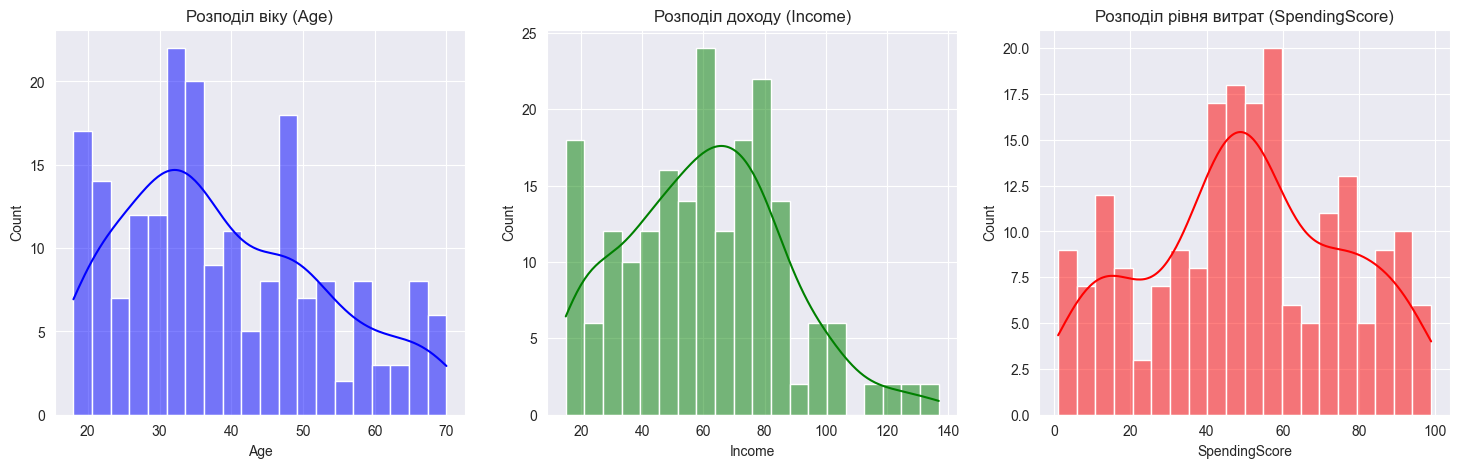

In [14]:
#yourCode

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(customer_set["Age"], bins=20, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Розподіл віку (Age)")

sns.histplot(customer_set["Income"], bins=20, kde=True, ax=axes[1], color="green")
axes[1].set_title("Розподіл доходу (Income)")

sns.histplot(customer_set["SpendingScore"], bins=20, kde=True, ax=axes[2], color="red")
axes[2].set_title("Розподіл рівня витрат (SpendingScore)")

plt.show()


**Завдання 4** 

Давайте подивимось на ці змінні `Age` , `Income` та `SpendingScore` відносно змінної `Gender`. 
* Побудуємо `pairplot` по всім змінним відностно змінної `Gender`:  
 
* Побудуємо `pairplot` використовуючи `sns.PairGrid` із заданими `(scatterplot)`, `(kdeplot)` та `(kdeplot, lw=1)` по відповідно правому верхньому куту, діагоналі і лівому нижньому кутут відносно змінної `Gender`:  
 

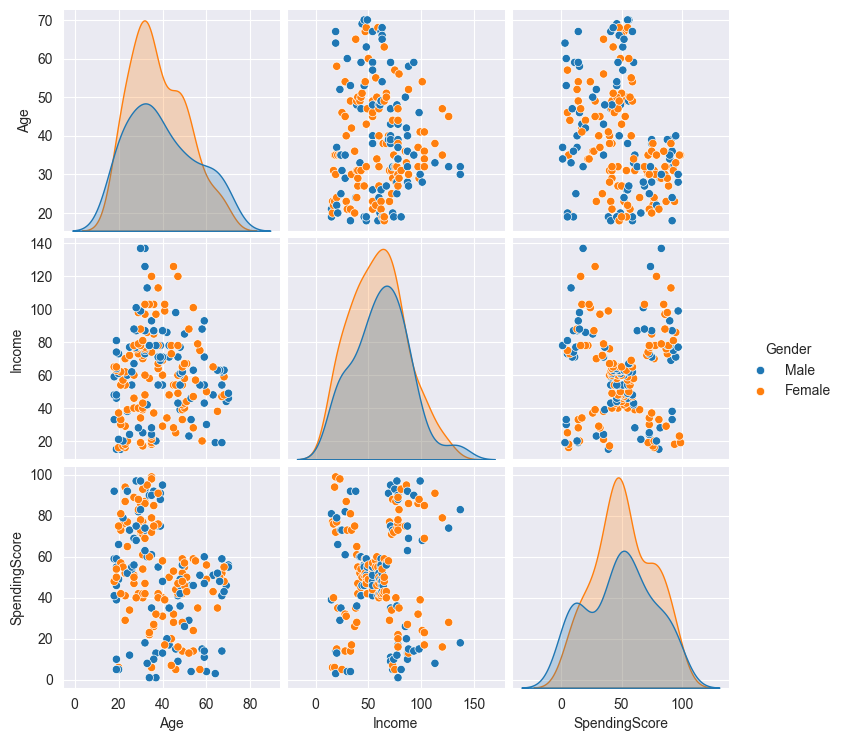

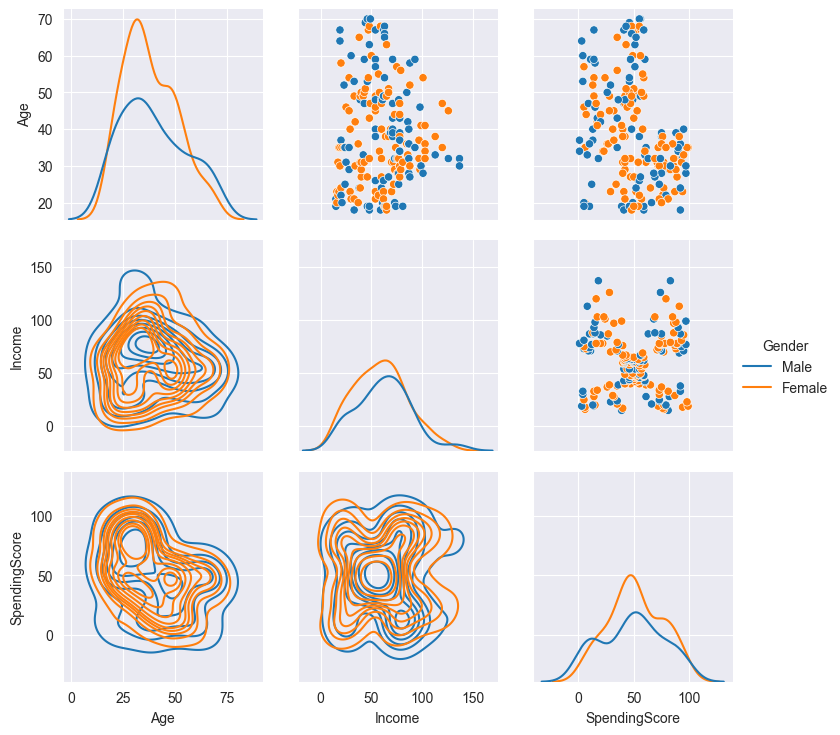

In [21]:
#yourCode

sns.pairplot(customer_set, hue="Gender", diag_kind="kde")
plt.show()

g = sns.PairGrid(customer_set, hue="Gender")

g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot)
g.map_lower(sns.kdeplot, lw=1)

g.add_legend()

plt.show()



**Висновки з 1-4 завдання (детальні)**

1.   
2.   
3. ...

**Завдання 5** 

Проаналізувати змінну `Gender`:
* вивести співвідношення по статям;
* побудувати `countplot` по `Gender`;  
* побудувати `pie`по `Gender'.  

Співвідношення клієнтів за статтю:
 Gender
Female    112
Male       88
Name: count, dtype: int64


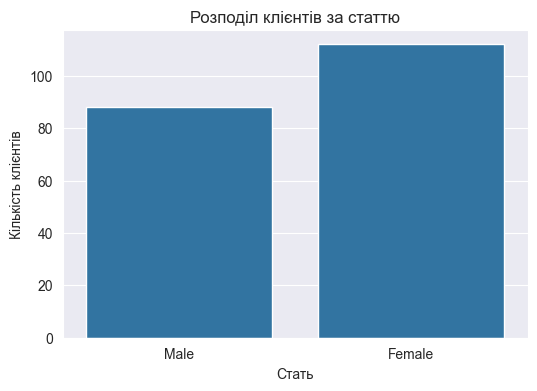

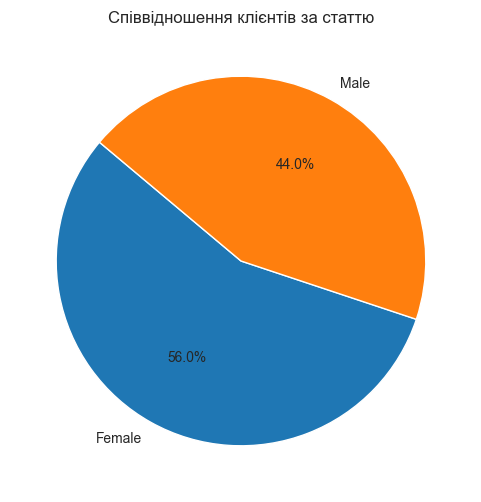

In [23]:
#yourCode

gender_counts = customer_set["Gender"].value_counts()

print("Співвідношення клієнтів за статтю:\n", gender_counts)

plt.figure(figsize=(6, 4))
sns.countplot(x="Gender", data=customer_set)

plt.title("Розподіл клієнтів за статтю")
plt.xlabel("Стать")
plt.ylabel("Кількість клієнтів")
plt.show()

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", startangle=140)
plt.title("Співвідношення клієнтів за статтю")
plt.show()

**Завдання 6** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінних `Age` та `Income` відносно змінної `Gender` з різними параметрами:
*  подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`.

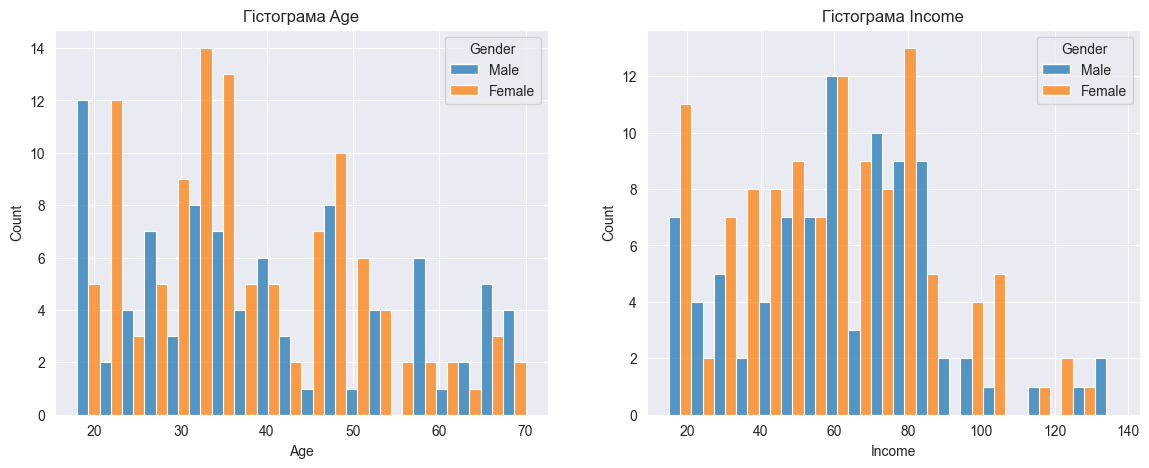

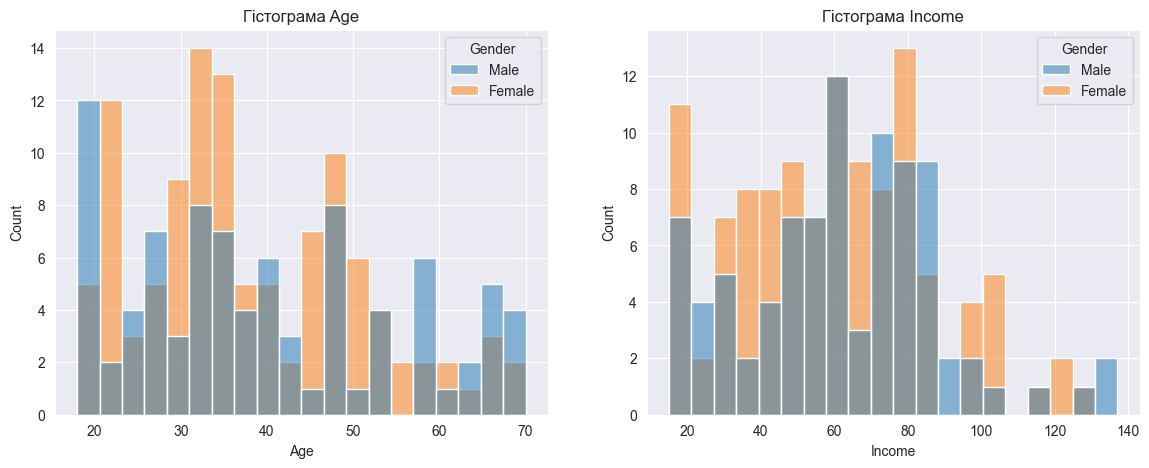

In [29]:
#yourCode

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

#dodge
sns.histplot(data=customer_set, x="Age", hue="Gender", multiple="dodge", bins=20, ax=axes[0])
axes[0].set_title("Гістограма Age")

sns.histplot(data=customer_set, x="Income", hue="Gender", multiple="dodge", bins=20, ax=axes[1])
axes[1].set_title("Гістограма Income")
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

#layer
sns.histplot(data=customer_set, x="Age", hue="Gender", multiple="layer", bins=20, ax=axes[0])
axes[0].set_title("Гістограма Age")

sns.histplot(data=customer_set, x="Income", hue="Gender", multiple="layer", bins=20, ax=axes[1])
axes[1].set_title("Гістограма Income")
plt.show()

**Завдання 7** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінної `SpendingScore` відносно змінної `Gender` з різними параметрами:  
* подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`. 



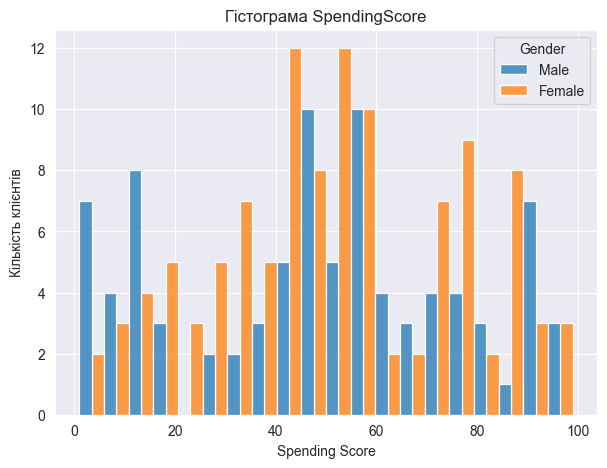

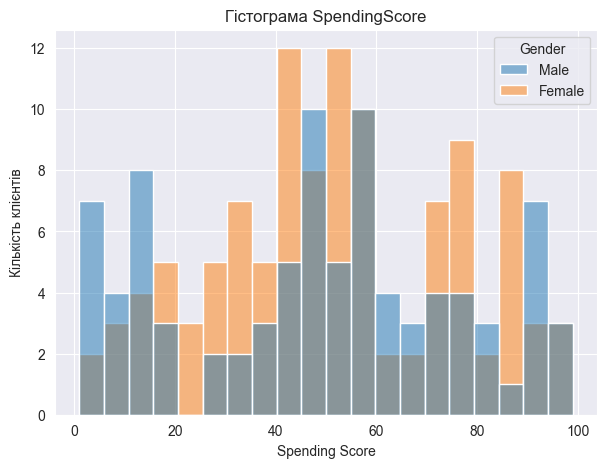

In [31]:
#yourCode

#dodge
plt.figure(figsize=(7, 5))
sns.histplot(data=customer_set, x="SpendingScore", hue="Gender", multiple="dodge", bins=20)

plt.title("Гістограма SpendingScore")
plt.xlabel("Spending Score")
plt.ylabel("Кількість клієнтів")
plt.show()

#layer
plt.figure(figsize=(7, 5))
sns.histplot(data=customer_set, x="SpendingScore", hue="Gender", multiple="layer", bins=20)

plt.title("Гістограма SpendingScore")
plt.xlabel("Spending Score")
plt.ylabel("Кількість клієнтів")
plt.show()

**Завдання 8** 

Побудувати `boxplot` по змінній `SpendingScore` і подивитись як відрізняються витрати відностно змінної `Gender`. 

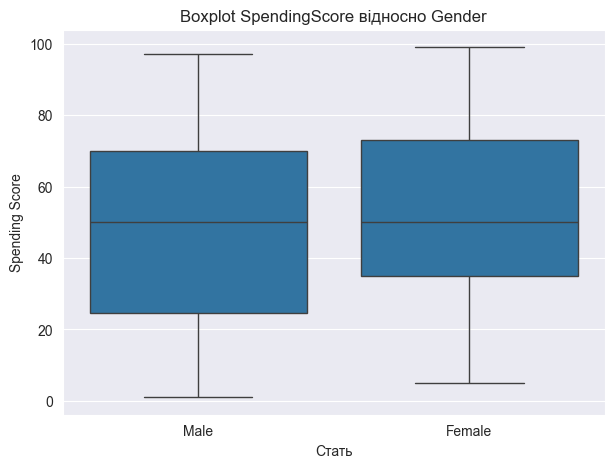

In [32]:
#yourCode

plt.figure(figsize=(7, 5))
sns.boxplot(x="Gender", y="SpendingScore", data=customer_set)

plt.title("Boxplot SpendingScore відносно Gender")
plt.xlabel("Стать")
plt.ylabel("Spending Score")
plt.show()

**Висновки з завдання 5 - 8(детальні)**

1.   Яке співвідношення груп чоловіків та жінок?
2.  Подивитись які можна виділити групи і як розподілені витрати відностно статі людини? 
3. Чи є різниця між витратами у чоловіків та жінок?
4. ...

## K-means Method ##

**Завдання 9** 

Як Ви могли помітити, вибірка, з якою ми працюємо, не містить ключової зміної з вірними мітками. Тому перед початком кластерування необхідно визначити (підібрати) оптимальну кількість кластерів на яке буде проведено розбиття. Для цього необхідно:
1. видалити змінну `Gender`, тому що ... **Чому?**;  
2. задати мінімальну та максимальну кількість кластерів самостійно;  
3. На прикладі алгоритму [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), для ознайомлення з тим як працювати в умовах коли кількість кластерів невідома заздалегіть і немає вірних міток з позначками до якого кластеру відноситься спостереження пропонується використати метод [Elbow](https://coderoad.ru/19197715/Scikit-Learn-K-Means-Elbow-criterion) (додаткові джерела: [article_1](https://medium.com/analytics-vidhya/elbow-method-of-k-means-clustering-algorithm-a0c916adc540#:~:text=K%2Dmeans%20clustering%20is%20an,cluster%20with%20the%20nearest%20centroid.), [article_2](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/))

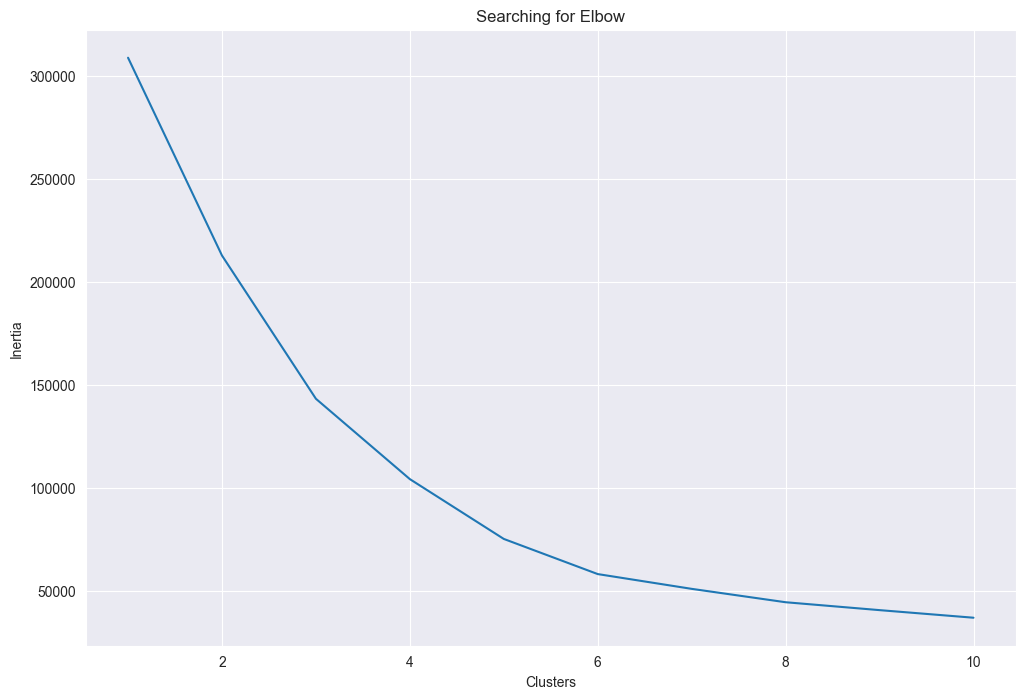

In [34]:
X = customer_set.drop(['Gender'], axis=1)

clusters = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    clusters.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

plt.show()


**Висновки з завдання 9 (детальні)** 

1.  Необхідно навести яка кількість кластерів на Вашу думку є оптимальною (краще розглянути для порівняння делька гіпотез про кількість кластерів)

Оптимальна кількість кластерів 3-4 бо якщо більше йде уповільнення енерції 

**Завдання 10** 

Зробити двовимірну візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи змінні `Income` та `SpendingScore`. 

<Axes: xlabel='Income', ylabel='SpendingScore'>

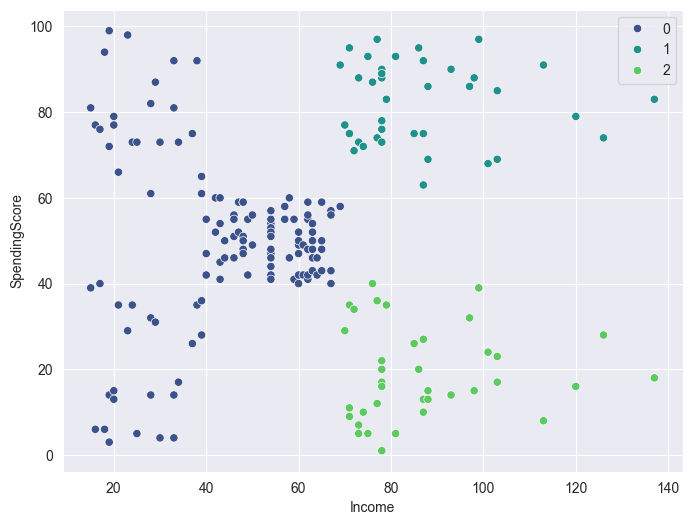

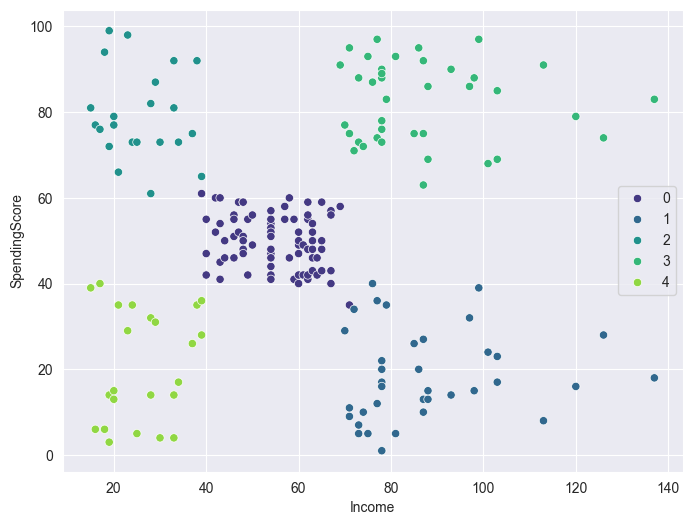

In [47]:
#yourCode

kmeans_3 = KMeans(n_clusters = 3).fit(X)
plt.figure(figsize=(8, 6))
sns.scatterplot(x = X['Income'], y = X['SpendingScore'], hue = kmeans_3.labels_, palette = sns.color_palette("viridis", 3))

kmeans_5 = KMeans(n_clusters = 5).fit(X)
plt.figure(figsize = (8, 6))
sns.scatterplot(x = X['Income'], y = X['SpendingScore'], hue = kmeans_5.labels_, palette = sns.color_palette("viridis", 5))

**Завдання 11** 

Зробити візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи [scatter_3d](https://plotly.com/python/3d-scatter-plots/).

In [74]:
km = KMeans(n_clusters=3, random_state=42)
df_3d = customer_set.drop(['Gender'], axis=1)

km.fit(df_3d[['Age', 'SpendingScore', 'Income']])

df_3d['Cluster'] = km.labels_

fig = px.scatter_3d(df_3d, x='Age', y='SpendingScore', z='Income')


**Висновки з завдання 10 - 11 (детальні)** 

1. Визначитась з отриманих візуалізацій яка кількість кластерів є оптимальною на Вашу думку і провести аналіз кластерів, що Ви отримали.
2.   
3. ...

## Agglomerative clustering ##

Розглянемо ще один підхід до кластеризації - [агломеративну ієрархічну кластеризацію](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

**Завдання 12** 

Кластеризуйте датасет за допомогою [агломеративної ієрархічнуої кластеризації](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

Мінімально необхідні параметри, що треба налаштувати:  
* `n_clusters`: параметр, який відповідає за кільксіть кластерів на яку буде проведено розбиття вибірки;  
* `linkage`: параметр зв’язку. Цей параметр визначає, яку відстань використовувати між наборами спостережень.
* перевірте як працює цей метод з різними параметрами `linkage`  
* після кожної зміни параметрів - візуалізувати розбиття на кластери

Розрахувати матрицю відстаней для нашого набору даних:
* за допомогою методу [hierarchy.linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) і матриці відстаней кластеризувати дані з різними значеннями параметра `method`
* за допомогою методу [hierarchy.dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) візуалізувати отримані результати кластеризації у вигляді дендрограм


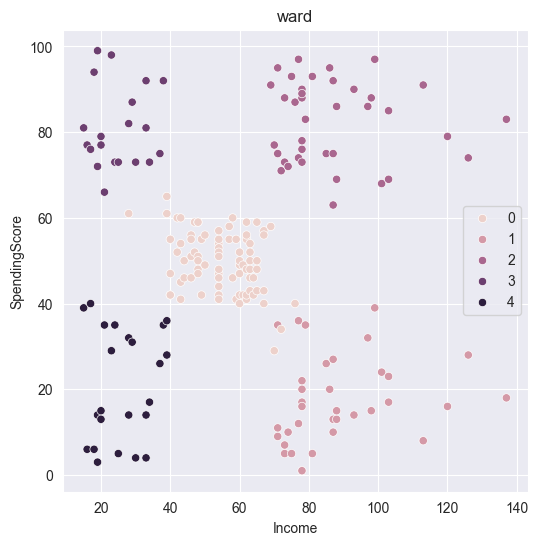

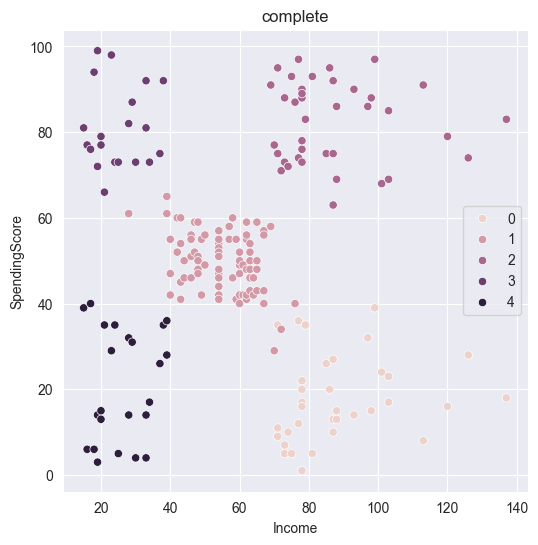

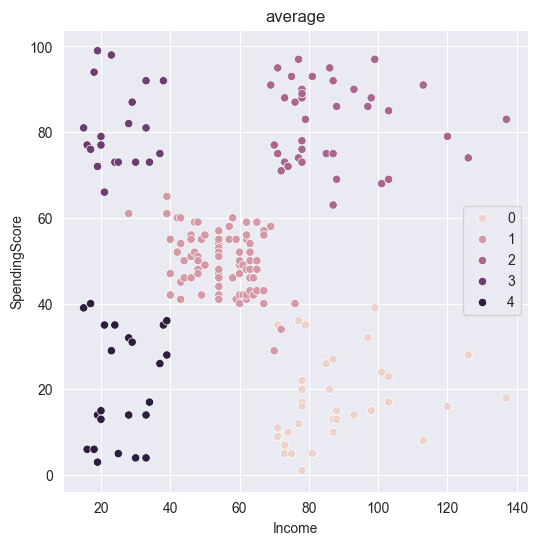

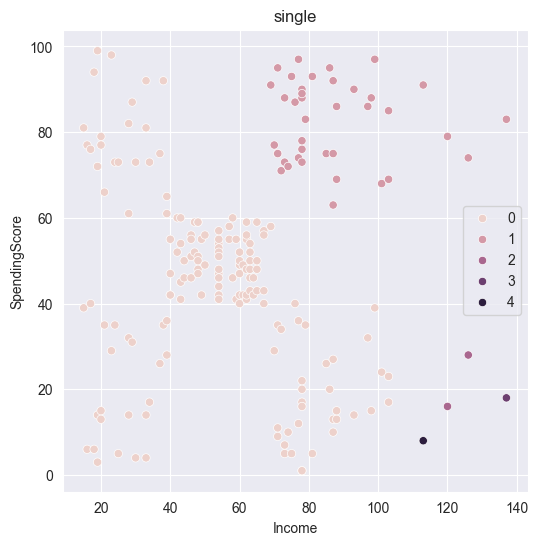

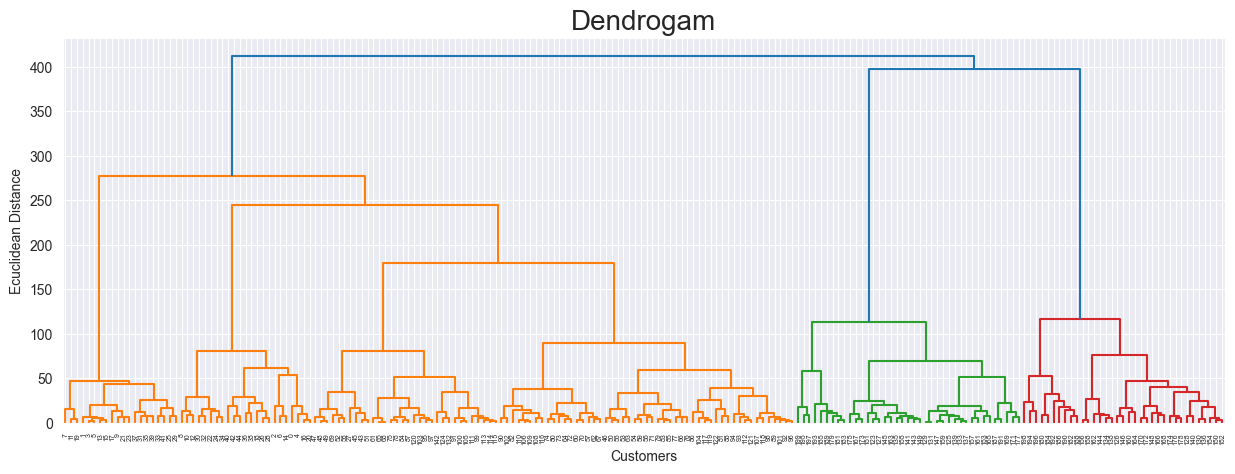

In [72]:
for j in ['ward','complete','average','single']:
    algo_cluster = AgglomerativeClustering(n_clusters = 5,linkage=j).fit(X)
    plt.figure(figsize =(6, 6))
    sns.scatterplot(x = 'Income', data=X,y='SpendingScore',
               hue = algo_cluster.fit_predict(X)).set_title(j)
    
    plt.show()

plt.figure(figsize = (15, 5))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(X, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

**Висновки з завдання 12 (детальні)**

1. 
2.   
3. ...

**Завдання 13** 

А тепер зробимо порівняльний аналіз отриманих результатів кластеризації розглянутими методами:  
* В фінальних візуалізаціях треба використовувати **однакову** (на вашу думку оптимальну) кількість кластерів!!!  

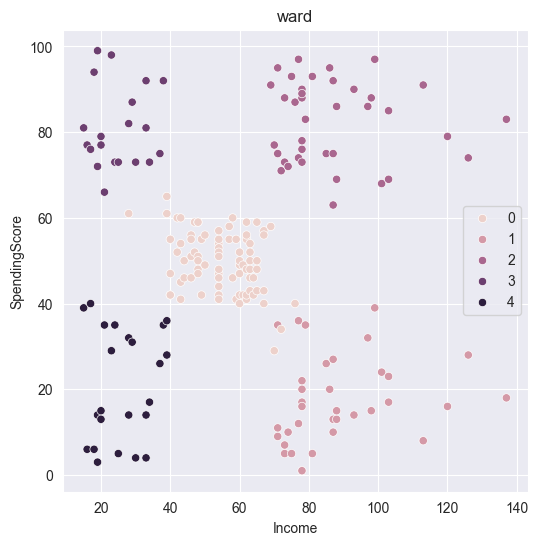

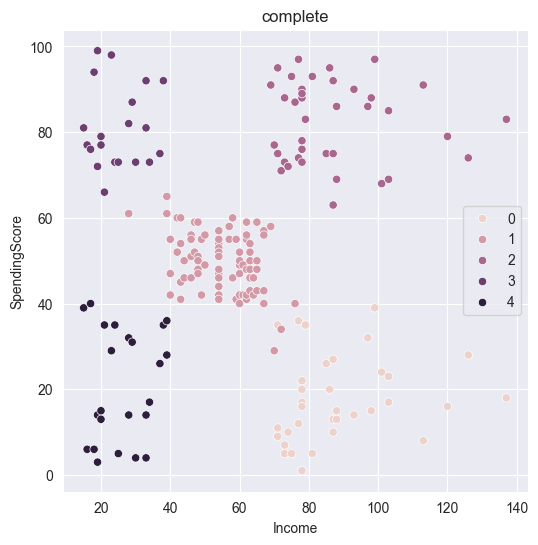

In [73]:
for j in ['ward','complete']:
    algo_cluster = AgglomerativeClustering(n_clusters = 5,linkage=j).fit(X)
    plt.figure(figsize =(6, 6))
    sns.scatterplot(x = 'Income', data=X,y='SpendingScore',
               hue = algo_cluster.fit_predict(X)).set_title(j)
    
    plt.show()

**Висновки з завдання 13 (детальні)**

1. 
2.   
3. ...